# Nvidia Stock Analysis

At this notebook, we will analyze the Nvidia stock data. We will use the data from kaggle dataset [Nvidia Stock Data](https://www.kaggle.com/datasets/muhammaddawood42/nvidia-stock-data) to analyze the stock data. We will use the data all data from 2018 - 2024 to analyze the stock data.

# Download and Import Dataset

We will download the dataset from kaggle and import the dataset to the notebook using kagglehub.

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammaddawood42/nvidia-stock-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\thari\.cache\kagglehub\datasets\muhammaddawood42\nvidia-stock-data\versions\1


In [34]:
import pandas as pd

dataset = pd.read_csv("data/NVIDIA_STOCK.csv")

In [35]:
dataset.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


From data above we need to delete frist two rows because it is not needed for the analysis and change Price coloumn name to Date

In [36]:
dataset = dataset[2:]
dataset = dataset.rename(columns={'Price': 'Date'})

In [37]:
dataset.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
5,2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
6,2018-01-08,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


# EDA

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 2 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1697 non-null   object
 1   Adj Close  1697 non-null   object
 2   Close      1697 non-null   object
 3   High       1697 non-null   object
 4   Low        1697 non-null   object
 5   Open       1697 non-null   object
 6   Volume     1697 non-null   object
dtypes: object(7)
memory usage: 92.9+ KB


In [39]:
# change the data type of the Date column
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Adj Close'] = pd.to_numeric(dataset['Adj Close'])
dataset['Close'] = pd.to_numeric(dataset['Close'])
dataset['High'] = pd.to_numeric(dataset['High'])
dataset['Low'] = pd.to_numeric(dataset['Low'])
dataset['Open'] = pd.to_numeric(dataset['Open'])
dataset['Volume'] = pd.to_numeric(dataset['Volume'])

In [40]:
dataset.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03
mean,24.797593,24.828411,25.295239,24.315422,24.823341,4.716865e+08
std,29.221442,29.216014,29.811740,28.570804,29.240504,2.093254e+08
min,3.151430,3.177000,3.249500,3.111500,3.162250,9.788400e+07
25%,6.113620,6.161750,6.250000,6.064250,6.166250,3.278440e+08
50%,13.985092,14.015750,14.243500,13.750000,14.033750,4.349650e+08
75%,27.088902,27.104000,27.496000,26.613001,27.077999,5.708320e+08
max,135.559067,135.580002,140.759995,132.419998,139.800003,2.511528e+09


From `.info()` we can see that there are 7 column and 1697 rows. There are no missing values in the dataset.

From `.describe()` we can see that the data is from 2018-2024. For column `Adj Close`, `Close`, `High, Low`, and `Open` we can see that the data is almost the same. For the `Volume` that traded we can see some different from min and max value. Which means that the volume that traded is different from day to day.


## 1. Price Changes Over Time

We will plot the stock price over time. We will plot the `Adj Close` and `Close` over time. From the plot, Price for NVIDIA is quite stable from 2018-2021. In 2021, the price is increasing and in 2022 the price is decreasing. From 2023 the price is increasing significantly. In 2024 the price is moving up and down with a significant increase in the price.

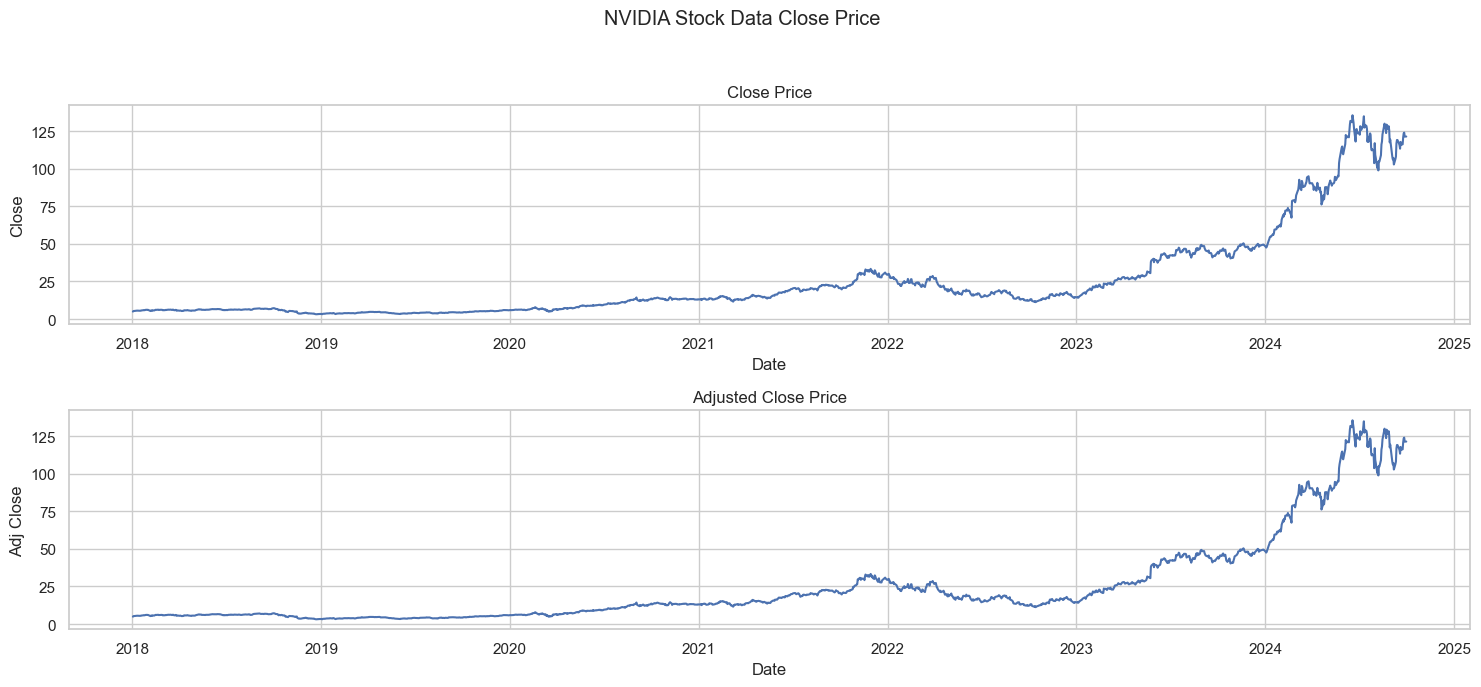

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 7))
fig.suptitle('NVIDIA Stock Data Close Price')

sns.lineplot(ax=axes[0], x=dataset['Date'], y=dataset['Close'])
axes[0].set_title('Close Price')
sns.lineplot(ax=axes[1], x=dataset['Date'], y=dataset['Adj Close'])
axes[1].set_title('Adjusted Close Price')

plt.tight_layout(rect=[0, 0, 1, 0.95])
sns.set_theme(style='whitegrid')

plt.show()

## 2. Distribution of the data

Distribution of the data can be seen from the histogram plot. From all the data we can see that all data have the sam distribution except for the `Volume` data. 

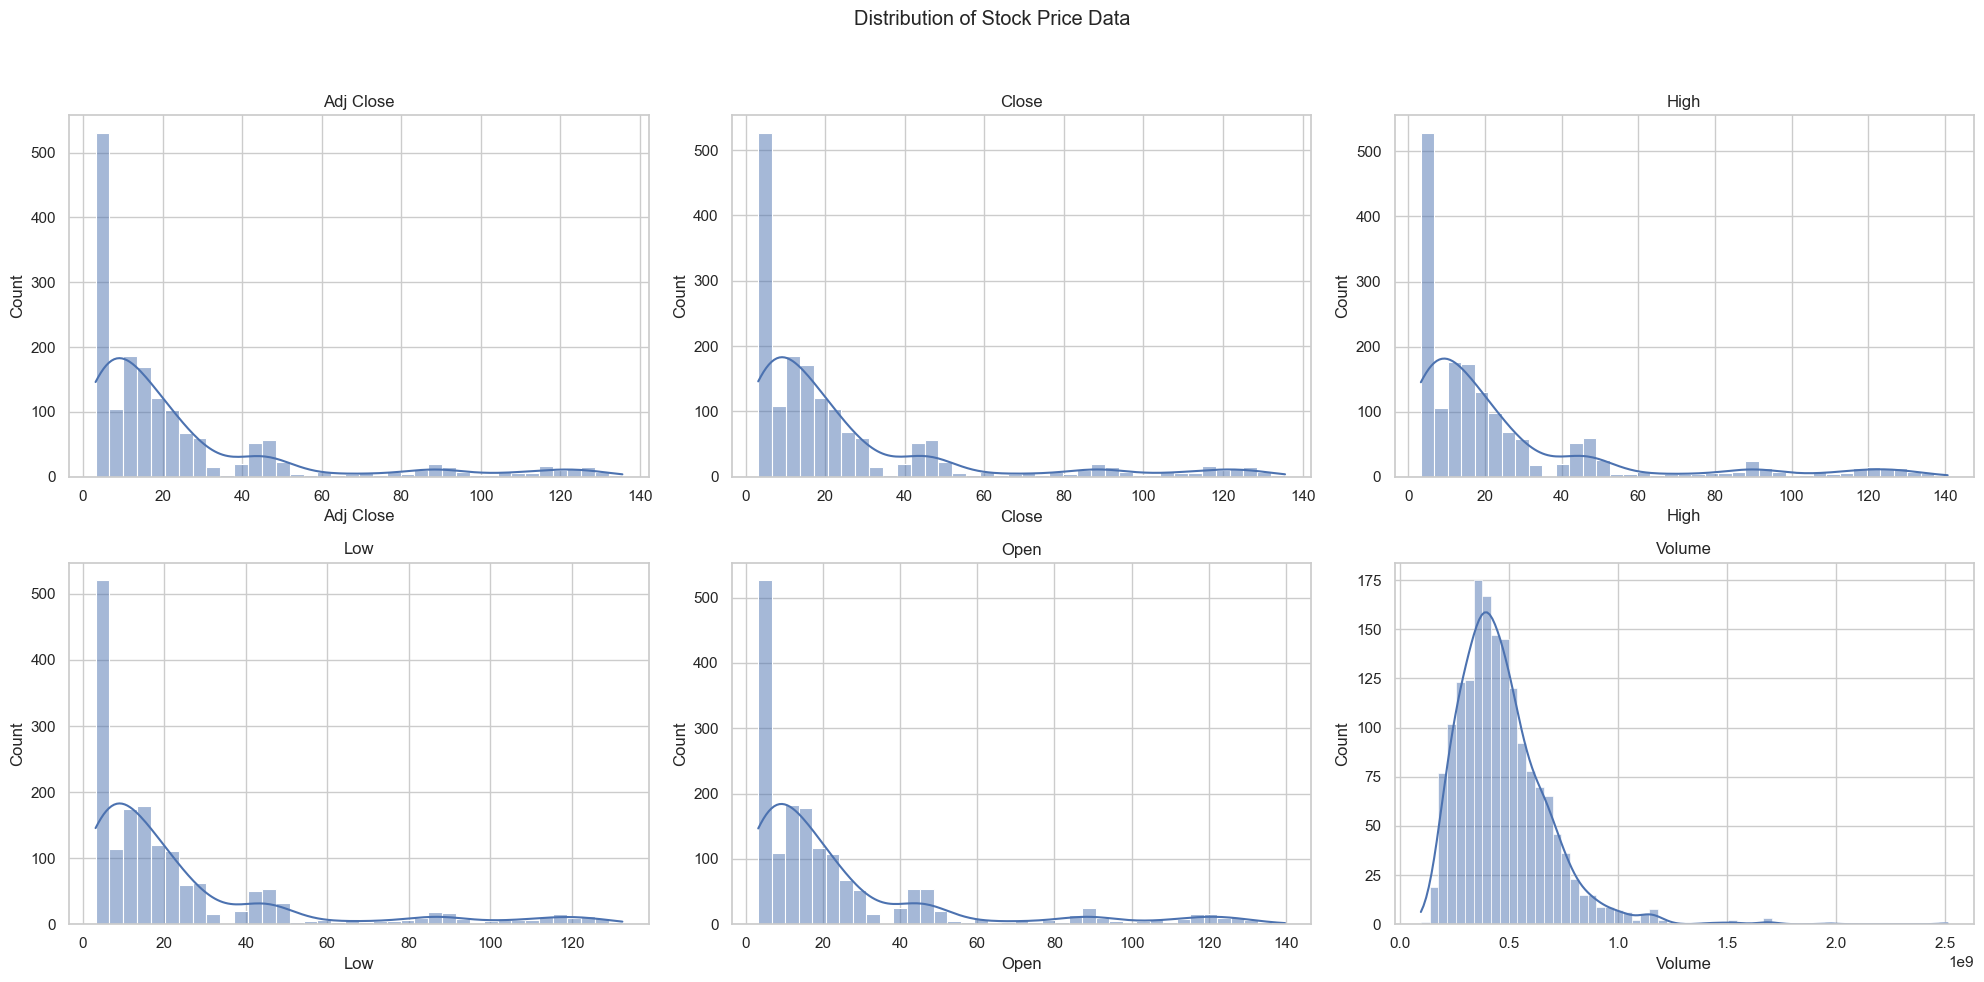

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Distribution of Stock Price Data')

columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for ax, col in zip(axes.flat, columns):
    sns.histplot(dataset[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Visualisation

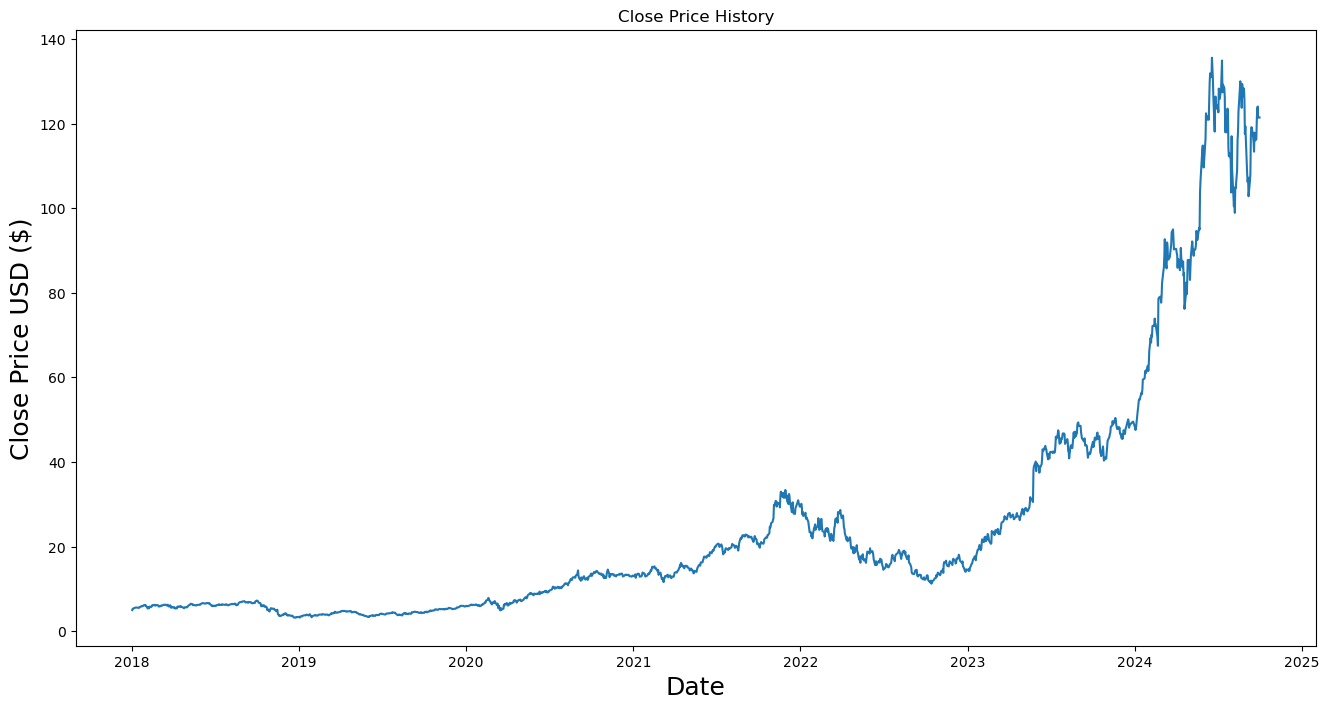

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

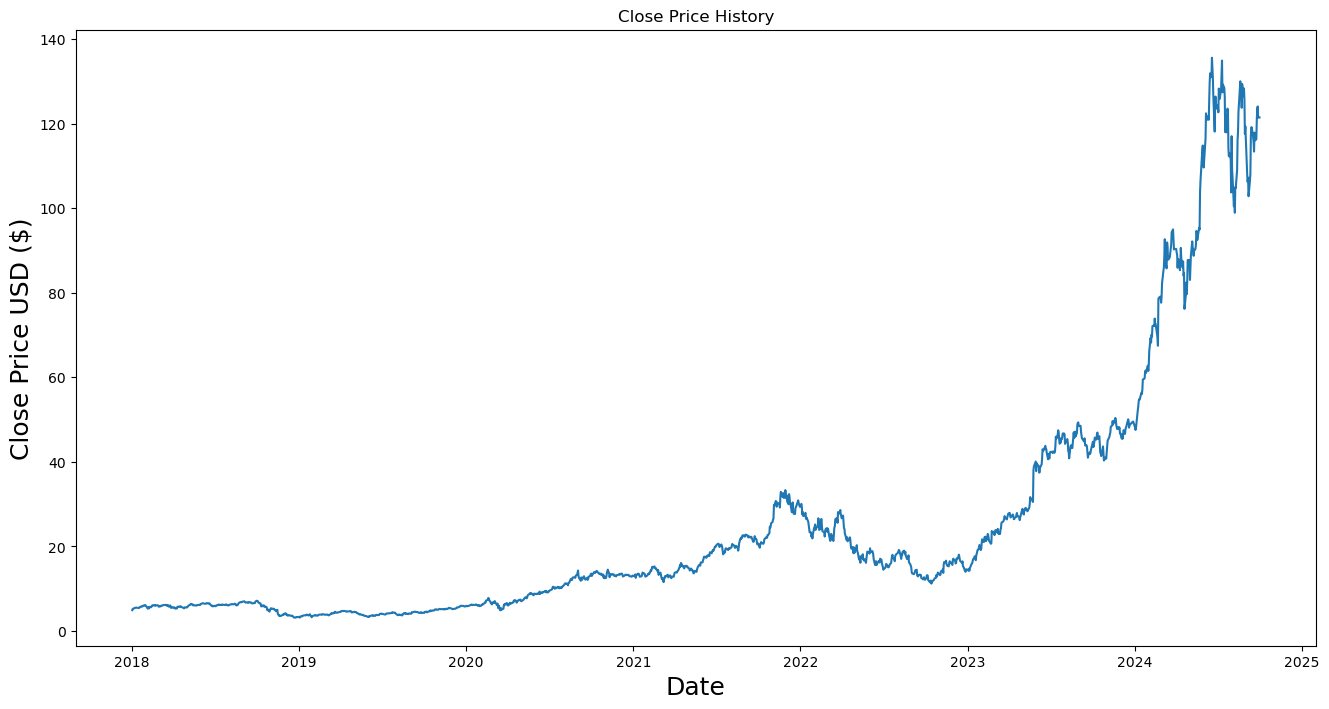

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

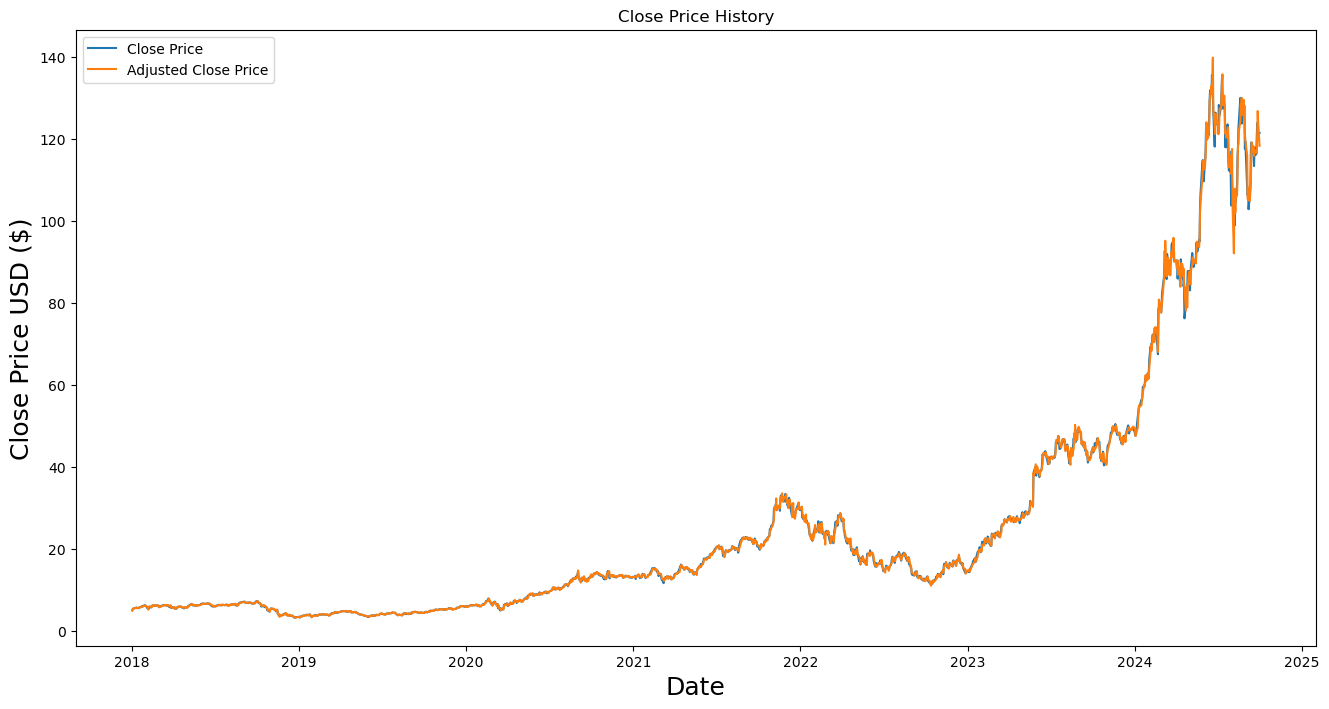

In [44]:
# compare the close price with the adjusted close price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Close'], label='Close Price')
plt.plot(dataset['Date'], dataset['Open'], label='Adjusted Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()